**CODE FOR SEVEN DAY WEATHER PREDICTION**

Forecast Weather Response: [{'dt': 1737460800, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'main': {'temp': 280.55, 'feels_like': 277.71, 'temp_min': 279.8, 'temp_max': 280.55, 'pressure': 1017, 'sea_level': 1017, 'grnd_level': 977, 'humidity': 76, 'temp_kf': 0.75}, 'wind': {'speed': 4.51, 'deg': 51, 'gust': 7.47}, 'clouds': {'all': 61}}, {'dt': 1737471600, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'main': {'temp': 279.81, 'feels_like': 278.52, 'temp_min': 278.33, 'temp_max': 279.81, 'pressure': 1017, 'sea_level': 1017, 'grnd_level': 977, 'humidity': 77, 'temp_kf': 1.48}, 'wind': {'speed': 1.93, 'deg': 53, 'gust': 2.69}, 'clouds': {'all': 70}}, {'dt': 1737482400, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'main': {'temp': 279.02, 'feels_like': 279.02, 'temp_min': 278.26, 'temp_max': 279.02, 'pressure': 1018, 'sea_level': 1018, 'grnd_level': 977

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2020
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0977
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0957
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1016
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0735
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0882
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0888
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0623
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0606
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0823
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0539
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0543
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1041
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0791
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0539
Epoch 16/50
37/

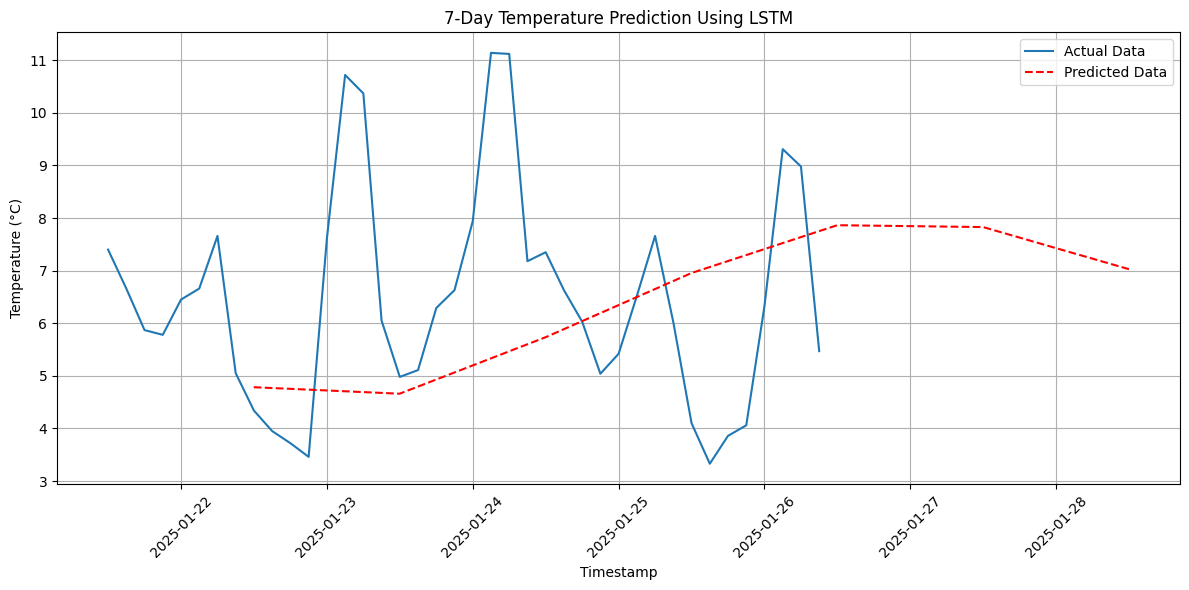


Predicted Temperatures for Next 7 Days:
                   Timestamp  Predicted Temperature
0 2025-01-22 11:57:51.729579               4.784176
1 2025-01-23 11:57:51.729655               4.660840
2 2025-01-24 11:57:51.729663               5.733468
3 2025-01-25 11:57:51.729668               6.953905
4 2025-01-26 11:57:51.729672               7.863840
5 2025-01-27 11:57:51.729676               7.828677
6 2025-01-28 11:57:51.729681               7.027803


In [ ]:
!pip install keras requests
import requests  # Import requests to make API calls
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Agro Monitoring API Key
API_KEY = "087fb05bba881ea4276f60dae1e0cb30"

# Coordinates for the location
latitude = 35
longitude = 139

# Function to fetch weather forecast
def get_weather_forecast(lat, lon, api_key):
    url = f"https://api.agromonitoring.com/agro/1.0/weather/forecast"
    params = {
        "lat": lat,
        "lon": lon,
        "appid": api_key,
    }
    response = requests.get(url, params=params)
    try:
        return response.json() if response.status_code == 200 else {"error": response.text}
    except Exception as e:
        print(f"Error parsing JSON: {e}")
        return {"error": "Failed to parse JSON"}

# Fetch weather data
forecast_weather = get_weather_forecast(latitude, longitude, API_KEY)

# Check if data is valid
if "error" in forecast_weather:
    print("Error fetching weather data:", forecast_weather["error"])
else:
    # Print the response for debugging
    print("Forecast Weather Response:", forecast_weather)

    # Ensure the data is a list of forecasts
    if isinstance(forecast_weather, list):
        # Extract relevant data
        data = []
        for forecast in forecast_weather:
            temp = forecast['main']['temp'] - 273.15  # Convert temperature from Kelvin to Celsius
            humidity = forecast['main']['humidity']
            rain = forecast.get('rain', {}).get('3h', 0)  # Rain in the past 3 hours (if available)
            timestamp = datetime.utcfromtimestamp(forecast['dt']).strftime('%Y-%m-%d %H:%M:%S')
            data.append([timestamp, temp, humidity, rain])

        # Convert data to DataFrame
        df = pd.DataFrame(data, columns=["Timestamp", "Temperature", "Humidity", "Rainfall"])
        df["Timestamp"] = pd.to_datetime(df["Timestamp"])  # Ensure Timestamp is datetime

        # Use temperature data for prediction
        temperature_data = df[['Temperature']].values

        # Normalize data
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(temperature_data)

        # Prepare data for LSTM
        def create_sequences(data, time_steps=3):
            X, y = [], []
            for i in range(len(data) - time_steps):
                X.append(data[i:i+time_steps, 0])
                y.append(data[i+time_steps, 0])
            return np.array(X), np.array(y)

        time_steps = 3
        X, y = create_sequences(scaled_data, time_steps)

        # Reshape X for LSTM input
        X = X.reshape((X.shape[0], X.shape[1], 1))

        # Build LSTM model
        model = Sequential([
            LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
            LSTM(50, activation='relu'),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Train the model
        model.fit(X, y, epochs=50, batch_size=1, verbose=1)

        # Predict future data
        future_steps = 7
        input_seq = scaled_data[-time_steps:]  # Use the last time_steps for prediction
        predictions = []

        for _ in range(future_steps):
            prediction = model.predict(input_seq.reshape((1, time_steps, 1)), verbose=0)
            predictions.append(prediction[0, 0])
            input_seq = np.append(input_seq[1:], prediction).reshape((time_steps, 1))

        # Transform predictions back to original scale
        predicted_temperatures = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

        # Append predicted temperatures to the DataFrame for visualization
        future_dates = [datetime.now() + pd.Timedelta(days=i+1) for i in range(future_steps)]
        future_df = pd.DataFrame({
            "Timestamp": future_dates,
            "Predicted Temperature": predicted_temperatures.flatten()
        })
        future_df["Timestamp"] = pd.to_datetime(future_df["Timestamp"])  # Ensure Timestamp is datetime

        # Plot the results
        plt.figure(figsize=(12, 6))
        plt.plot(df["Timestamp"], temperature_data, label="Actual Data")
        plt.plot(future_df["Timestamp"], future_df["Predicted Temperature"], label="Predicted Data", linestyle='dashed', color='red')
        plt.xlabel("Timestamp")
        plt.ylabel("Temperature (°C)")
        plt.title("7-Day Temperature Prediction Using LSTM")
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid()
        plt.tight_layout()
        plt.show()

        # Print predicted temperatures
        print("\nPredicted Temperatures for Next 7 Days:")
        print(future_df)
    else:
        print("Unexpected data format. Forecast weather should be a list of dictionaries.")


CODE TO HARVEST OR SOW

In [ ]:
import pandas as pd

# Sample crop data table (replace with your actual crop data)
crop_data = {
    "CROP": ["Rice", "Tea", "Jute", "Sugarcane", "Pea", "Maize", "Potato", "Wheat", "Banana", "Lemon", "Pineapple"],
    "SOWING TEMP": ["20–25", "20–25", "24–35", "20–32", "10–18", "21–27", "15–24", "10–25", "15–35", "25–30", "22–32"],
    "HARVEST TEMP": ["20–30", "23–28", "28–32", "25–30", "15–25", "25–30", "18–20", "25–30", "20–30", "25", "25–30"],
    "Humidity Level": ["70–90%", "80–90%", "65–95%", "60–80%", "50–70%", "50–80%", "60–80%", "50–70%", "75–85%", "60–70%", "70–80%"],
    "RAINFALL": ["1000–2000 mm", "2000–4000 mm", "1500–2500 mm", "1000–1500 mm", "600–1000 mm", "500–800 mm", "500–750 mm", "300–900 mm", "1500–2000 mm", "1500–2500 mm", "1000–1500 mm"]
}

# Convert crop data into a DataFrame
df = pd.DataFrame(crop_data)

# Function to parse ranges safely with debugging
def parse_range(value, delimiter="–", replace_str=None):
    try:
        if replace_str:
            value = value.replace(replace_str, "").strip()
        parts = value.split(delimiter)
        if len(parts) == 2:
            return list(map(int, parts))
        elif len(parts) == 1:  # Handle single values (e.g., "25" instead of "25–30")
            return [int(parts[0]), int(parts[0])]
        else:
            print(f"Unexpected format in value: {value}")
            return [None, None]
    except Exception as e:
        print(f"Error parsing range '{value}': {e}")
        return [None, None]

# Function to check if the crop is suitable for sowing and harvesting
def check_crop_suitability(crop_data, weather_data):
    suitability_results = []

    for _, crop in crop_data.iterrows():
        crop_name = crop['CROP']

        # Parse ranges safely
        sowing_temp_range = parse_range(crop['SOWING TEMP'])
        harvest_temp_range = parse_range(crop['HARVEST TEMP'])
        humidity_range = parse_range(crop['Humidity Level'], replace_str="%")
        rainfall_min, rainfall_max = parse_range(crop['RAINFALL'], replace_str=" mm")

        # Debugging output for ranges
        print(f"Processing {crop_name}:")
        print(f"  Sowing Temp Range: {sowing_temp_range}")
        print(f"  Harvest Temp Range: {harvest_temp_range}")
        print(f"  Humidity Range: {humidity_range}")
        print(f"  Rainfall Range: {rainfall_min}-{rainfall_max}")

        suitable_sow = False
        suitable_harvest = False

        for _, day in weather_data.iterrows():
            temp = day['Temperature']
            humidity = day['Humidity']
            rainfall = day['Rainfall']

            # Check for sowing suitability
            if (
                sowing_temp_range[0] is not None
                and sowing_temp_range[1] is not None
                and sowing_temp_range[0] <= temp <= sowing_temp_range[1]
                and humidity_range[0] <= humidity <= humidity_range[1]
                and rainfall_min <= rainfall <= rainfall_max
            ):
                suitable_sow = True

            # Check for harvesting suitability
            if (
                harvest_temp_range[0] is not None
                and harvest_temp_range[1] is not None
                and harvest_temp_range[0] <= temp <= harvest_temp_range[1]
                and humidity_range[0] <= humidity <= humidity_range[1]
            ):
                suitable_harvest = True

        suitability_results.append({
            "Crop": crop_name,
            "Suitable to Sow": "Yes" if suitable_sow else "No",
            "Suitable to Harvest": "Yes" if suitable_harvest else "No"
        })

    return pd.DataFrame(suitability_results)

# Example weather data for the next 7 days
weather_data = pd.DataFrame({
    "Day": ["Day 1", "Day 2", "Day 3", "Day 4", "Day 5", "Day 6", "Day 7"],
    "Temperature": [25, 26, 27, 28, 29, 30, 31],  # in °C
    "Humidity": [80, 78, 75, 70, 72, 74, 76],  # in %
    "Rainfall": [15, 10, 20, 5, 25, 30, 10]  # in mm
})

# Check crop suitability
crop_suitability_results = check_crop_suitability(df, weather_data)

# Display the results using pandas
print("Crop Suitability Results:")
print(crop_suitability_results)


Processing Rice:
  Sowing Temp Range: [20, 25]
  Harvest Temp Range: [20, 30]
  Humidity Range: [70, 90]
  Rainfall Range: 1000-2000
Processing Tea:
  Sowing Temp Range: [20, 25]
  Harvest Temp Range: [23, 28]
  Humidity Range: [80, 90]
  Rainfall Range: 2000-4000
Processing Jute:
  Sowing Temp Range: [24, 35]
  Harvest Temp Range: [28, 32]
  Humidity Range: [65, 95]
  Rainfall Range: 1500-2500
Processing Sugarcane:
  Sowing Temp Range: [20, 32]
  Harvest Temp Range: [25, 30]
  Humidity Range: [60, 80]
  Rainfall Range: 1000-1500
Processing Pea:
  Sowing Temp Range: [10, 18]
  Harvest Temp Range: [15, 25]
  Humidity Range: [50, 70]
  Rainfall Range: 600-1000
Processing Maize:
  Sowing Temp Range: [21, 27]
  Harvest Temp Range: [25, 30]
  Humidity Range: [50, 80]
  Rainfall Range: 500-800
Processing Potato:
  Sowing Temp Range: [15, 24]
  Harvest Temp Range: [18, 20]
  Humidity Range: [60, 80]
  Rainfall Range: 500-750
Processing Wheat:
  Sowing Temp Range: [10, 25]
  Harvest Temp Range

Forecast Weather Response: [{'dt': 1737806400, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'main': {'temp': 294.14, 'feels_like': 293.97, 'temp_min': 292.63, 'temp_max': 294.14, 'pressure': 1011, 'sea_level': 1011, 'grnd_level': 991, 'humidity': 64, 'temp_kf': 1.51}, 'wind': {'speed': 0.61, 'deg': 193, 'gust': 0.65}, 'clouds': {'all': 40}}, {'dt': 1737817200, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'main': {'temp': 292.82, 'feels_like': 292.46, 'temp_min': 290.19, 'temp_max': 292.82, 'pressure': 1012, 'sea_level': 1012, 'grnd_level': 993, 'humidity': 62, 'temp_kf': 2.63}, 'wind': {'speed': 1.59, 'deg': 189, 'gust': 1.52}, 'clouds': {'all': 28}}, {'dt': 1737828000, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'main': {'temp': 290.56, 'feels_like': 290, 'temp_min': 288.77, 'temp_max': 290.56, 'pressure': 1012, 'sea_level': 1012, 'grnd_level': 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3233
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1972
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0979
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1101
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1126
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0961
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0945
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0856
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1036
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0990
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1207
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0931
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0903
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1090
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0774
Epoch 16/50
37/37 ━━━━━━━━━━━━

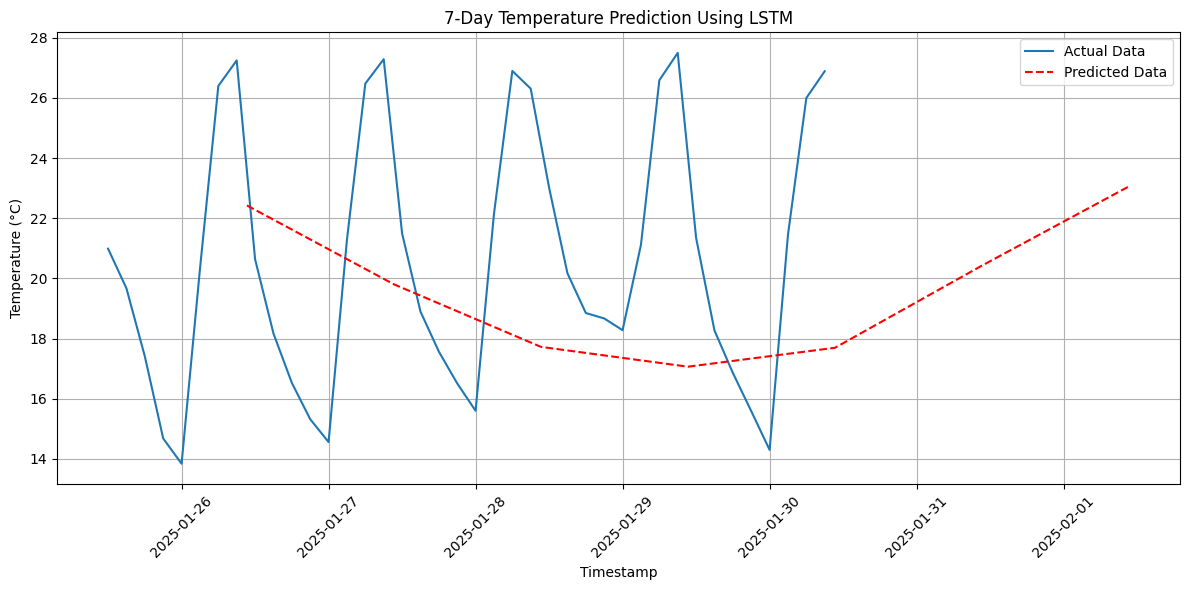


Predicted Temperatures for Next 7 Days:
                   Timestamp  Predicted Temperature
0 2025-01-26 10:40:12.419099              22.426905
1 2025-01-27 10:40:12.419172              19.804567
2 2025-01-28 10:40:12.419184              17.724586
3 2025-01-29 10:40:12.419191              17.065796
4 2025-01-30 10:40:12.419199              17.694790
5 2025-01-31 10:40:12.419206              20.427299
6 2025-02-01 10:40:12.419213              23.060091


In [ ]:
!pip install keras requests
import requests  # Import requests to make API calls
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Agro Monitoring API Key
API_KEY = "087fb05bba881ea4276f60dae1e0cb30"

# Coordinates for the location
latitude = 26.1158
longitude = 91.7086

# Function to fetch weather forecast
def get_weather_forecast(lat, lon, api_key):
    url = f"https://api.agromonitoring.com/agro/1.0/weather/forecast"
    params = {
        "lat": lat,
        "lon": lon,
        "appid": api_key,
    }
    response = requests.get(url, params=params)
    try:
        return response.json() if response.status_code == 200 else {"error": response.text}
    except Exception as e:
        print(f"Error parsing JSON: {e}")
        return {"error": "Failed to parse JSON"}

# Fetch weather data
forecast_weather = get_weather_forecast(latitude, longitude, API_KEY)

# Check if data is valid
if "error" in forecast_weather:
    print("Error fetching weather data:", forecast_weather["error"])
else:
    # Print the response for debugging
    print("Forecast Weather Response:", forecast_weather)

    # Ensure the data is a list of forecasts
    if isinstance(forecast_weather, list):
        # Extract relevant data
        data = []
        for forecast in forecast_weather:
            temp = forecast['main']['temp'] - 273.15  # Convert temperature from Kelvin to Celsius
            humidity = forecast['main']['humidity']
            rain = forecast.get('rain', {}).get('3h', 0)  # Rain in the past 3 hours (if available)
            timestamp = datetime.utcfromtimestamp(forecast['dt']).strftime('%Y-%m-%d %H:%M:%S')
            data.append([timestamp, temp, humidity, rain])

        # Convert data to DataFrame
        df = pd.DataFrame(data, columns=["Timestamp", "Temperature", "Humidity", "Rainfall"])
        df["Timestamp"] = pd.to_datetime(df["Timestamp"])  # Ensure Timestamp is datetime

        # Use temperature data for prediction
        temperature_data = df[['Temperature']].values

        # Normalize data
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(temperature_data)

        # Prepare data for LSTM
        def create_sequences(data, time_steps=3):
            X, y = [], []
            for i in range(len(data) - time_steps):
                X.append(data[i:i+time_steps, 0])
                y.append(data[i+time_steps, 0])
            return np.array(X), np.array(y)

        time_steps = 3
        X, y = create_sequences(scaled_data, time_steps)

        # Reshape X for LSTM input
        X = X.reshape((X.shape[0], X.shape[1], 1))

        # Build LSTM model
        model = Sequential([
            LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
            LSTM(50, activation='relu'),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Train the model
        model.fit(X, y, epochs=50, batch_size=1, verbose=1)

        # Predict future data
        future_steps = 7
        input_seq = scaled_data[-time_steps:]  # Use the last time_steps for prediction
        predictions = []

        for _ in range(future_steps):
            prediction = model.predict(input_seq.reshape((1, time_steps, 1)), verbose=0)
            predictions.append(prediction[0, 0])
            input_seq = np.append(input_seq[1:], prediction).reshape((time_steps, 1))

        # Transform predictions back to original scale
        predicted_temperatures = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

        # Append predicted temperatures to the DataFrame for visualization
        future_dates = [datetime.now() + pd.Timedelta(days=i+1) for i in range(future_steps)]
        future_df = pd.DataFrame({
            "Timestamp": future_dates,
            "Predicted Temperature": predicted_temperatures.flatten()
        })
        future_df["Timestamp"] = pd.to_datetime(future_df["Timestamp"])  # Ensure Timestamp is datetime

        # Plot the results
        plt.figure(figsize=(12, 6))
        plt.plot(df["Timestamp"], temperature_data, label="Actual Data")
        plt.plot(future_df["Timestamp"], future_df["Predicted Temperature"], label="Predicted Data", linestyle='dashed', color='red')
        plt.xlabel("Timestamp")
        plt.ylabel("Temperature (°C)")
        plt.title("7-Day Temperature Prediction Using LSTM")
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid()
        plt.tight_layout()
        plt.show()

        # Print predicted temperatures
        print("\nPredicted Temperatures for Next 7 Days:")
        print(future_df)
    else:
        print("Unexpected data format. Forecast weather should be a list of dictionaries.")


In [ ]:
!pip install keras requests
import requests  # Import requests to make API calls
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Agro Monitoring API Key
API_KEY = "087fb05bba881ea4276f60dae1e0cb30"

# Coordinates for the location
latitude = 26.1158
longitude = 91.7086

# Function to fetch weather forecast
def get_weather_forecast(lat, lon, api_key):
    url = f"https://api.agromonitoring.com/agro/1.0/weather/forecast"
    params = {
        "lat": lat,
        "lon": lon,
        "appid": api_key,
    }
    response = requests.get(url, params=params)
    try:
        return response.json() if response.status_code == 200 else {"error": response.text}
    except Exception as e:
        print(f"Error parsing JSON: {e}")
        return {"error": "Failed to parse JSON"}

# Fetch weather data
forecast_weather = get_weather_forecast(latitude, longitude, API_KEY)

# Check if data is valid
if "error" in forecast_weather:
    print("Error fetching weather data:", forecast_weather["error"])
else:
    # Print the response for debugging
    print("Forecast Weather Response:", forecast_weather)

    # Ensure the data is a list of forecasts
    if isinstance(forecast_weather, list):
        # Extract relevant data
        data = []
        for forecast in forecast_weather:
            temp = forecast['main']['temp'] - 273.15  # Convert temperature from Kelvin to Celsius
            humidity = forecast['main']['humidity']
            rain = forecast.get('rain', {}).get('3h', 0)  # Rain in the past 3 hours (if available)
            timestamp = datetime.utcfromtimestamp(forecast['dt']).strftime('%Y-%m-%d %H:%M:%S')
            data.append([timestamp, temp, humidity, rain])

        # Convert data to DataFrame
        df = pd.DataFrame(data, columns=["Timestamp", "Temperature", "Humidity", "Rainfall"])
        df["Timestamp"] = pd.to_datetime(df["Timestamp"])  # Ensure Timestamp is datetime

        # Use temperature data for prediction
        temperature_data = df[['Temperature']].values

        # Normalize data
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(temperature_data)

        # Prepare data for LSTM
        def create_sequences(data, time_steps=3):
            X, y = [], []
            for i in range(len(data) - time_steps):
                X.append(data[i:i+time_steps, 0])
                y.append(data[i+time_steps, 0])
            return np.array(X), np.array(y)

        time_steps = 3
        X, y = create_sequences(scaled_data, time_steps)

        # Reshape X for LSTM input
        X = X.reshape((X.shape[0], X.shape[1], 1))

        # Build LSTM model
        model = Sequential([
            LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
            LSTM(50, activation='relu'),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Train the model
        model.fit(X, y, epochs=50, batch_size=1, verbose=1)

        # Predict future data
        future_steps = 7
        input_seq = scaled_data[-time_steps:]  # Use the last time_steps for prediction
        predictions = []

        for _ in range(future_steps):
            prediction = model.predict(input_seq.reshape((1, time_steps, 1)), verbose=0)
            predictions.append(prediction[0, 0])
            input_seq = np.append(input_seq[1:], prediction).reshape((time_steps, 1))

        # Transform predictions back to original scale
        predicted_temperatures = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

        # Append predicted temperatures to the DataFrame for visualization
        future_dates = [datetime.now() + pd.Timedelta(days=i+1) for i in range(future_steps)]
        future_df = pd.DataFrame({
            "Timestamp": future_dates,
            "Predicted Temperature": predicted_temperatures.flatten()
        })
        future_df["Timestamp"] = pd.to_datetime(future_df["Timestamp"])  # Ensure Timestamp is datetime

        # Plot the results
        plt.figure(figsize=(12, 6))
        plt.plot(df["Timestamp"], temperature_data, label="Actual Data")
        plt.plot(future_df["Timestamp"], future_df["Predicted Temperature"], label="Predicted Data", linestyle='dashed', color='red')
        plt.xlabel("Timestamp")
        plt.ylabel("Temperature (°C)")
        plt.title("7-Day Temperature Prediction Using LSTM")
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid()
        plt.tight_layout()
        plt.show()

        # Print predicted temperatures
        print("\nPredicted Temperatures for Next 7 Days:")
        print(future_df)
    else:
        print("Unexpected data format. Forecast weather should be a list of dictionaries.")


In [ ]:
import requests



# Replace with your API key and location coordinates

api_key = "087fb05bba881ea4276f60dae1e0cb30"

lat = 26.0000

lon = 90.0000



url = f"https://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}&units=metric"



response = requests.get(url)

data = response.json()



# Access and print the next 7 days' high and low temperatures

for i in range(0, 7 * 8, 8):  # Access data every 8 elements (one day)

    day_data = data['list'][i]

    print(f"Day {int(i/8) + 1}: High: {round(day_data['main']['temp_max'], 1)}°C, Low: {round(day_data['main']['temp_min'], 1)}°C")

SyntaxError: invalid non-printable character U+00A0 (<ipython-input-4-e8e91a411b0c>, line 31)

In [ ]:
import requests

# Replace with your API key and location coordinates
api_key = "087fb05bba881ea4276f60dae1e0cb30"
lat = 26.0000
lon = 90.0000

url = f"https://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}&units=metric"

response = requests.get(url)
data = response.json()

# Access and print the next 7 days' high and low temperatures
for i in range(0, 7 * 8, 8):  # Access data every 8 elements (one day)
    day_data = data['list'][i]
    print(f"Day {int(i/8) + 1}: High: {round(day_data['main']['temp_max'], 1)}°C, Low: {round(day_data['main']['temp_min'], 1)}°C")


KeyError: 'list'

In [ ]:
import requests

# Replace with your API key and location coordinates
api_key = "087fb05bba881ea4276f60dae1e0cb30"
lat = 26.0000
lon = 90.0000

url = f"https://api.openweathermap.org/data/2.5/forecast?lat=26.0000&lon=90.0000&appid=087fb05bba881ea4276f60dae1e0cb30&units=metric"


response = requests.get(url)
data = response.json()

# Debugging: Print the response to check for errors
if "list" not in data:
    print("Error in API response:", data)
else:
    # Access and print the next 7 days' high and low temperatures
    for i in range(0, 7 * 8, 8):  # Access data every 8 elements (one day)
        day_data = data['list'][i]
        print(f"Day {int(i/8) + 1}: High: {round(day_data['main']['temp_max'], 1)}°C, Low: {round(day_data['main']['temp_min'], 1)}°C")


Error in API response: {'cod': 401, 'message': 'Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.'}


CODE TO SPRAY PESTICIDE OR NOT-


In [ ]:
import pandas as pd

# Sample crop data table (replace with your actual crop data)
crop_data = {
    "CROP": ["Rice", "Tea", "Jute", "Sugarcane", "Pea", "Maize", "Potato", "Wheat", "Banana", "Lemon", "Pineapple"],
    "SOIL MOISTURE": ["90%", "60-70%", "80-90%", "60-80%", "60-80%", "80%", "60-80%", "60-80%", "60-70%", "50-60%", "45-65%"],
    "RAINFALL": ["1000–2000 mm", "2000–4000 mm", "1500–2500 mm", "1000–1500 mm", "600–1000 mm", "500–800 mm", "500–750 mm", "300–900 mm", "1500–2000 mm", "1500–2500 mm", "1000–1500 mm"]
}

# Convert crop data into a DataFrame
df = pd.DataFrame(crop_data)

# Function to check pesticide and irrigation needs
def check_pesticide_and_irrigation(crop_data, weather_data):
    results = []

    for _, crop in crop_data.iterrows():
        crop_name = crop['CROP']
        suitable_for_pesticide = False
        needs_irrigation = False

        # Extract crop-specific ranges
        try:
            soil_moisture = crop['SOIL MOISTURE'].replace('%', '').split('-')
            min_soil_moisture = int(soil_moisture[0]) if len(soil_moisture) > 1 else int(soil_moisture[0])

            rainfall_range = crop['RAINFALL'].replace(' mm', '').split('–')
            rainfall_min = int(rainfall_range[0]) if len(rainfall_range) > 1 else int(rainfall_range[0])
        except KeyError as e:
            print(f"Missing column in crop data: {e}")
            continue

        for _, day in weather_data.iterrows():
            temp = day['Temperature']
            humidity = day['Humidity']
            rainfall = day['Rainfall']
            wind_speed = day['Wind Speed']

            # Pesticide conditions
            if humidity > 60 and temp > 25 and wind_speed < 5:
                suitable_for_pesticide = True

            # Irrigation conditions
            if rainfall < rainfall_min and min_soil_moisture < 30:
                needs_irrigation = True

        results.append({
            "Crop": crop_name,
            "Pesticide Needed": "Yes" if suitable_for_pesticide else "No",
            "Irrigation Needed": "Yes" if needs_irrigation else "No"
        })

    return pd.DataFrame(results)

# Example weather data (including wind speed for pesticide conditions)
weather_data = pd.DataFrame({
    "Day": ["Day 1", "Day 2", "Day 3", "Day 4", "Day 5", "Day 6", "Day 7"],
    "Temperature": [25, 28, 30, 32, 29, 27, 26],  # in °C
    "Humidity": [70, 75, 80, 60, 65, 62, 68],  # in %
    "Rainfall": [5, 0, 10, 0, 15, 0, 20],  # in mm
    "Wind Speed": [3, 2, 6, 4, 5, 3, 4]  # in km/h
})

# Using the crop data table
pesticide_irrigation_results = check_pesticide_and_irrigation(df, weather_data)

# Display the results
print("Pesticide and Irrigation Recommendations:")
print(pesticide_irrigation_results)


Pesticide and Irrigation Recommendations:
         Crop Pesticide Needed Irrigation Needed
0        Rice              Yes                No
1         Tea              Yes                No
2        Jute              Yes                No
3   Sugarcane              Yes                No
4         Pea              Yes                No
5       Maize              Yes                No
6      Potato              Yes                No
7       Wheat              Yes                No
8      Banana              Yes                No
9       Lemon              Yes                No
10  Pineapple              Yes                No
